In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [12]:
source_path = os.getcwd()
training_dir = os.path.join(source_path, 'training' + '/' )
testing_dir = os.path.join(source_path, 'testing' + '/')
print(training_dir)

d:\BANGKIT\CAPSTONE PROJECT\FOODRISM\training/


In [13]:
def train_val_generator(training, validation):
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')
    
    train_generator = train_datagen.flow_from_directory(
        directory=training,
        batch_size=16,
        class_mode='categorical',
        target_size=(244,244)
    )

    validation_datagen = ImageDataGenerator(rescale=1./255)
    validation_generator = validation_datagen.flow_from_directory(
        directory=validation,
        batch_size=16,
        class_mode='categorical',
        target_size=(244,244)
    )

    return train_generator, validation_generator

In [14]:
train_generator, validation_generator = train_val_generator(training_dir, testing_dir)

Found 604 images belonging to 15 classes.
Found 151 images belonging to 15 classes.


In [15]:
def create_model():
    model = tf.keras.models.Sequential([
        # 1
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(244, 244, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        # 2
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(112,112,3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.5),
        # 3
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu', input_shape=(56,56,3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        # 4
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu', input_shape=(28,28,3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.5),
        # flatten
        tf.keras.layers.Flatten(),
        #dropout
        tf.keras.layers.Dropout(0.5),
        # dense
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(15, activation='softmax')
    ])

    model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
        loss = 'categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [16]:
model = create_model()

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 242, 242, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 121, 121, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 119, 119, 128)     73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 59, 59, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 59, 59, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 57, 57, 256)      

In [18]:
history = model.fit(train_generator,
    epochs=100,
    verbose=1,
    validation_data=validation_generator
)

Epoch 1/100
38/38 [==============================] - 17s 418ms/step - loss: 2.7571 - accuracy: 0.0629 - val_loss: 2.7046 - val_accuracy: 0.1457
Epoch 2/100
38/38 [==============================] - 14s 365ms/step - loss: 2.6909 - accuracy: 0.1109 - val_loss: 2.6599 - val_accuracy: 0.1589
Epoch 3/100
38/38 [==============================] - 17s 439ms/step - loss: 2.5455 - accuracy: 0.1374 - val_loss: 2.4456 - val_accuracy: 0.1987
Epoch 4/100
38/38 [==============================] - 16s 421ms/step - loss: 2.3489 - accuracy: 0.2086 - val_loss: 2.2583 - val_accuracy: 0.2649
Epoch 5/100
38/38 [==============================] - 14s 371ms/step - loss: 2.1196 - accuracy: 0.2781 - val_loss: 2.1383 - val_accuracy: 0.2914
Epoch 6/100
38/38 [==============================] - 14s 369ms/step - loss: 1.9736 - accuracy: 0.2980 - val_loss: 1.9287 - val_accuracy: 0.3709
Epoch 7/100
38/38 [==============================] - 15s 384ms/step - loss: 1.9217 - accuracy: 0.3179 - val_loss: 2.1449 - val_accuracy:

In [21]:
#tf.saved_model.save(model, source_path)
model.save("foodrism.model", save_format="h5")

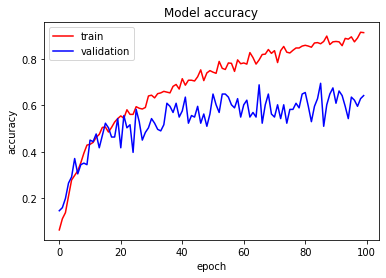

In [22]:
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.savefig('plot.png')
plt.show()
